In [0]:
from google.colab import drive
drive.mount('/content/gdrive' )

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
%cd '/content/gdrive/My Drive/comp4900 assignment3'
!ls

/content/gdrive/My Drive/comp4900 assignment3
ExampleSubmissionRandom.csv  models	  TrainLabels.csv
final_models		     predictions  Train.pkl
LoadData.ipynb		     Test.pkl	  tutorial.ipynb


In [0]:
import pickle
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras import activations
from keras.layers.core import Dense, Flatten, Dropout
from keras.layers.convolutional import *
from keras.layers.pooling import *
from keras.layers.normalization import BatchNormalization
from keras import optimizers
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import GaussianNoise

Using TensorFlow backend.


##Data preparation

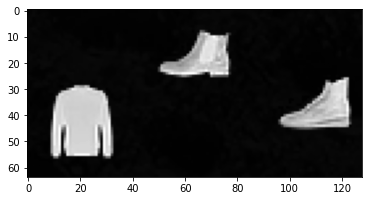

In [0]:
data = pickle.load( open( './Train.pkl', 'rb' ), encoding='bytes')
targets = np.genfromtxt('./TrainLabels.csv', delimiter=',')
plt.imshow(data[-188,:,:],cmap='gray', vmin=0, vmax=256)

In [0]:
#encode the labels into categorical onehot vector
train_labels = to_categorical(targets)

In [0]:
classes = Counter(targets)
values = classes.values()

In [0]:
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
          'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

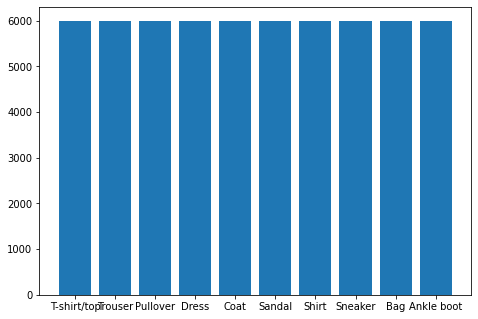

In [0]:
#  Plot the distribution of the classes
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels,list(values))
plt.show()

In [0]:
# Reshape the data into a shape that is expected by our CNN for our input layer
data2 = data.reshape(60000, 64, 128,1)

In [0]:
'''
Given that the data is evenly distributed we want to have the amount of training and testing
data for each classes
'''
X_train, X_test, y_train, y_test = [], [], [], []
for index in range(0,60000,6000):
  x_temp_train, x_temp_test, y_temp_train, y_temp_test = train_test_split(
      data2[index:index+6000], train_labels[index:index+6000], test_size=0.15, random_state=42)

  for item1, item2 in zip(x_temp_train, y_temp_train): 
    X_train.append(item1)
    y_train.append(item2)
  
  for item1, item2 in zip(x_temp_test, y_temp_test): 
    X_test.append(item1)
    y_test.append(item2)

In [0]:
# Converting list to numpy array
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [0]:
'''
early on we did a random train test split on all the data using this
'''
# X_train, X_test, y_train, y_test = train_test_split(data2, train_labels, test_size=0.15, random_state=42)

##Keras Models

In [0]:
models = []

##Model1

In [0]:
models.append(Sequential([
    Conv2D(16, kernel_size=(3, 3), input_shape=(64, 128,1), activation='relu', padding='same'),
        
    Flatten(),
    BatchNormalization(),
    Dense(10,activation='softmax')
]))

models[0].summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 128, 16)       160       
_________________________________________________________________
flatten_1 (Flatten)          (None, 131072)            0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 131072)            524288    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1310730   
Total params: 1,835,178
Trainable params: 1,573,034
Non-trainable params: 262,144
_________________________________________________________________


##Model2

In [0]:
models.append(Sequential([
    Conv2D(16, kernel_size=(3, 3), input_shape=(64, 128,1), activation='relu', padding='same'),
    
    Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    
    Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'),

    Flatten(),
    BatchNormalization(),
    Dense(10,activation='softmax')
]))

models[1].summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 64, 128, 16)       160       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 128, 64)       9280      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 128, 128)      73856     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1048576)           0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 1048576)           4194304   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10485770  
Total params: 14,763,370
Trainable params: 12,666,218
Non-trainable params: 2,097,152
__________________________________

##Model3

In [0]:
models.append(Sequential([
    Conv2D(16, kernel_size=(3, 3), input_shape=(64, 128,1), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2), padding='valid'),
    
    Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2), padding='valid'),

    Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2), padding='valid'),
    
    Flatten(),
    BatchNormalization(),
    Dense(10,activation='softmax')
]))
models[2].summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 64, 128, 16)       160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 64, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 64, 64)        9280      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 32, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 16, 128)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 16384)            

##Model4

In [0]:
models.append(Sequential([
    Conv2D(64, kernel_size=(3, 3), input_shape=(64, 128,1), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2), padding='valid'),
    BatchNormalization(),

    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2), padding='valid'),
    BatchNormalization(),

    Conv2D(64, kernel_size=(3, 3),activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2), padding='valid'),
    BatchNormalization(),

    Conv2D(32, kernel_size=(3, 3),activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2), padding='valid'),
    BatchNormalization(),
    
    Conv2D(64, kernel_size=(3, 3),activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2), padding='valid'),
    BatchNormalization(),
    
    Conv2D(64, kernel_size=(3, 3),activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2), padding='valid'),
    BatchNormalization(),
    Dropout(0.2),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(10,activation='softmax')
]))
models[3].summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 64, 128, 64)       640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 64, 64)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 32, 64, 64)        256       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 64, 32)        18464     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 32, 32)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 16, 32, 32)        128       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 32, 64)       

##Model5

In [0]:
models.append(Sequential([
    GaussianNoise(0.01, input_shape=(64, 128,1)),
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2), padding='valid'),
    BatchNormalization(),
    Dropout(0.5),

    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2), padding='valid'),
    BatchNormalization(),

    Conv2D(64, kernel_size=(3, 3),activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2), padding='valid'),
    BatchNormalization(),
    Dropout(0.3),

    Conv2D(32, kernel_size=(3, 3),activation='relu', padding='same'),
    # MaxPooling2D(pool_size=(2,2), padding='valid'),
    BatchNormalization(),
    
    Conv2D(64, kernel_size=(3, 3),activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2), padding='valid'),
    BatchNormalization(),
    
    Conv2D(64, kernel_size=(3, 3),activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2), padding='valid'),
    BatchNormalization(),
    Dropout(0.8),

    Conv2D(200, kernel_size=(3, 3),activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2), padding='valid'),
    BatchNormalization(),

    
    Flatten(),
    Dense(300, activation='relu', use_bias=True),
    Dropout(0.5),
    Dense(256, activation='relu', use_bias=True),
    Dropout(0.2),
    Dense(128, activation='relu', use_bias=True),
    # Dropout(0.3),
    Dense(10,activation='softmax')
]))
models[5].summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gaussian_noise_2 (GaussianNo (None, 64, 128, 1)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 64, 128, 64)       640       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 32, 64, 64)        0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 32, 64, 64)        256       
_________________________________________________________________
dropout_8 (Dropout)          (None, 32, 64, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 32, 64, 32)        18464     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 16, 32, 32)       

##Model6

In [0]:

models.append(Sequential([
    GaussianNoise(0.01, input_shape=(64, 128,1)),
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2), padding='valid'),
    BatchNormalization(),
    Dropout(0.5),

    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2), padding='valid'),
    BatchNormalization(),

    Conv2D(64, kernel_size=(3, 3),activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2), padding='valid'),
    BatchNormalization(),
    Dropout(0.3),

   
    Conv2D(64, kernel_size=(3, 3),activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2), padding='valid'),
    BatchNormalization(),
    
    Conv2D(64, kernel_size=(3, 3),activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2), padding='valid'),
    BatchNormalization(),
    Dropout(0.8),

    Conv2D(200, kernel_size=(3, 3),activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2), padding='valid'),
    BatchNormalization(),

    
    Flatten(),
    Dense(300, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    # Dropout(0.3),
    Dense(10,activation='softmax')
]))

models[6].summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 64, 128, 64)       640       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 32, 64, 64)        0         
_________________________________________________________________
batch_normalization_23 (Batc (None, 32, 64, 64)        256       
_________________________________________________________________
dropout_13 (Dropout)         (None, 32, 64, 64)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 32, 64, 32)        18464     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 16, 32, 32)        0         
_________________________________________________________________
batch_normalization_24 (Batc (None, 16, 32, 32)       

In [0]:
'''
Format that got you 90.4000% accuracy
es_best_model16
'''
# model5 = Sequential([
#     # Dense(16, activation='relu', input_shape=(64, 128,1)),
#     Conv2D(64, kernel_size=(3, 3), input_shape=(64, 128,1), activation='relu', padding='same'),
#     MaxPooling2D(pool_size=(2,2), padding='valid'),
#     BatchNormalization(),
#     Dropout(0.5),

#     Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
#     MaxPooling2D(pool_size=(2,2), padding='valid'),
#     BatchNormalization(),

#     Conv2D(64, kernel_size=(3, 3),activation='relu', padding='same'),
#     MaxPooling2D(pool_size=(2,2), padding='valid'),
#     BatchNormalization(),
#     Dropout(0.3),

#     Conv2D(32, kernel_size=(3, 3),activation='relu', padding='same'),
#     # MaxPooling2D(pool_size=(2,2), padding='valid'),
#     BatchNormalization(),
    
#     Conv2D(64, kernel_size=(3, 3),activation='relu', padding='same'),
#     MaxPooling2D(pool_size=(2,2), padding='valid'),
#     BatchNormalization(),
    
#     Conv2D(64, kernel_size=(3, 3),activation='relu', padding='same'),
#     MaxPooling2D(pool_size=(2,2), padding='valid'),
#     BatchNormalization(),
#     Dropout(0.8),

#     Conv2D(200, kernel_size=(3, 3),activation='relu', padding='same'),
#     MaxPooling2D(pool_size=(2,2), padding='valid'),
#     BatchNormalization(),

    
#     Flatten(),
#     Dense(300, activation='relu'),
#     Dropout(0.5),
#     Dense(256, activation='relu'),
#     # Dropout(0.2),
#     Dense(128, activation='relu'),
#     # Dropout(0.3),
#     Dense(10,activation='softmax')
# ])

# model.summary()

##Model7

In [0]:

models.append(Sequential([
    # Dense(16, activation='relu', input_shape=(64, 128,1)),
    Conv2D(64, kernel_size=(3, 3), input_shape=(64, 128,1), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2), padding='valid'),
    BatchNormalization(),
    Dropout(0.5),

    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2), padding='valid'),
    BatchNormalization(),

    Conv2D(64, kernel_size=(3, 3),activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2), padding='valid'),
    BatchNormalization(),
    Dropout(0.3),

    Conv2D(32, kernel_size=(3, 3),activation='relu', padding='same'),
    # MaxPooling2D(pool_size=(2,2), padding='valid'),
    BatchNormalization(),
    
    Conv2D(64, kernel_size=(3, 3),activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2), padding='valid'),
    BatchNormalization(),
    
    Conv2D(64, kernel_size=(3, 3),activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2), padding='valid'),
    BatchNormalization(),
    Dropout(0.8),

    Conv2D(200, kernel_size=(3, 3),activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2), padding='valid'),
    BatchNormalization(),

    Flatten(),
    Dense(300, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    # Dropout(0.3),
    Dense(10,activation='softmax')
]))

models[6].summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 64, 128, 64)       640       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 32, 64, 64)        0         
_________________________________________________________________
batch_normalization_23 (Batc (None, 32, 64, 64)        256       
_________________________________________________________________
dropout_13 (Dropout)         (None, 32, 64, 64)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 32, 64, 32)        18464     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 16, 32, 32)        0         
_________________________________________________________________
batch_normalization_24 (Batc (None, 16, 32, 32)       

In [0]:
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])
# model.compile( optimizer=RMSprop(lr=LEARNING_RATE), loss='mse', metrics=["accuracy"])

# sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
# model.compile(loss='mean_squared_error', optimizer=sgd, metrics=["accuracy"])

##Training

In [0]:
sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
for model in models:
  model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=["accuracy"])

In [0]:
histories = []

In [0]:
for index, model in enumerate(models):
  callbacks = [EarlyStopping(monitor='val_loss', mode='min', patience=20),
             ModelCheckpoint(filepath=f'final_models/model{index}.h5', monitor='val_loss', mode='min', save_best_only=True)]
  histories.append(
      model.fit(X_train, y_train, batch_size=50, callbacks=callbacks, validation_data=(X_test, y_test), verbose=0, shuffle=True, epochs=1000))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




In [0]:
for index, history in enumerate(histories):
  with open(f'final_models/histories/history{index}', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

##Training performance measurements

##Model1 history

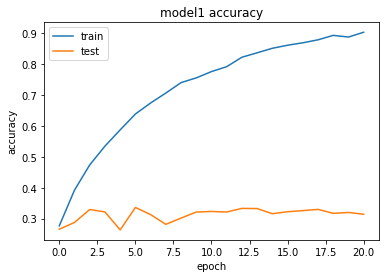

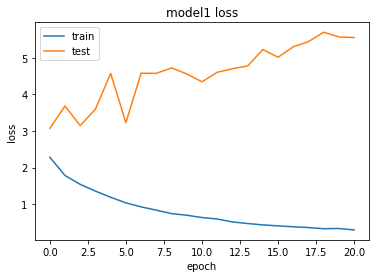

In [0]:
plt.plot(histories[0].history['acc'])
plt.plot(histories[0].history['val_acc'])
plt.title('model1 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(histories[0].history['loss'])
plt.plot(histories[0].history['val_loss'])
plt.title('model1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##Model2 history

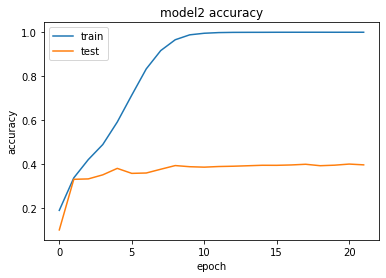

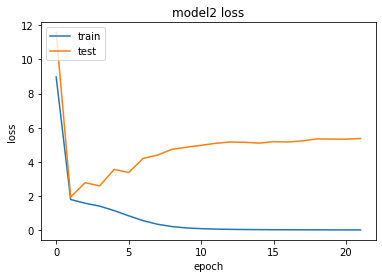

In [0]:
plt.plot(histories[1].history['acc'])
plt.plot(histories[1].history['val_acc'])
plt.title('model2 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(histories[1].history['loss'])
plt.plot(histories[1].history['val_loss'])
plt.title('model2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##Model3 history

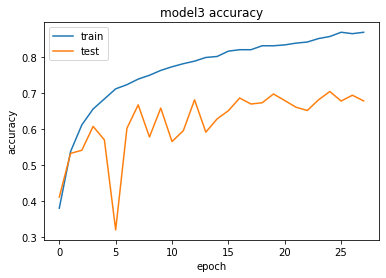

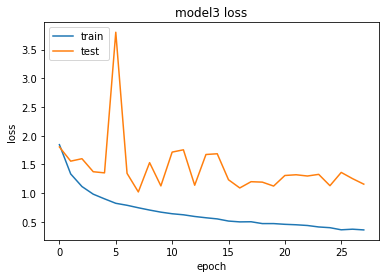

In [0]:
plt.plot(histories[2].history['acc'])
plt.plot(histories[2].history['val_acc'])
plt.title('model3 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(histories[2].history['loss'])
plt.plot(histories[2].history['val_loss'])
plt.title('model3 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##Model4 history

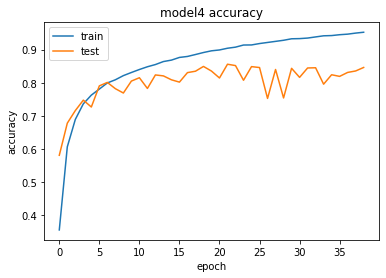

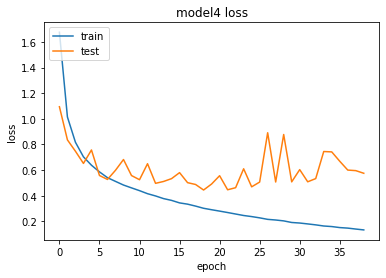

In [0]:
plt.plot(histories[3].history['acc'])
plt.plot(histories[3].history['val_acc'])
plt.title('model4 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(histories[3].history['loss'])
plt.plot(histories[3].history['val_loss'])
plt.title('model4 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##Model5 history

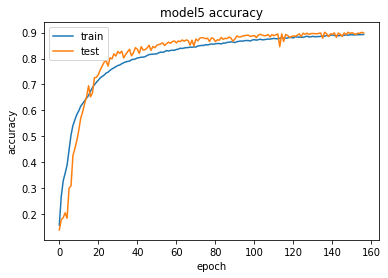

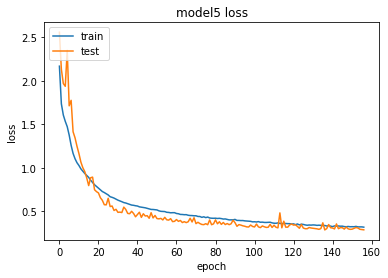

In [0]:
plt.plot(histories[4].history['acc'])
plt.plot(histories[4].history['val_acc'])
plt.title('model5 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(histories[4].history['loss'])
plt.plot(histories[4].history['val_loss'])
plt.title('model5 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##Model6 history

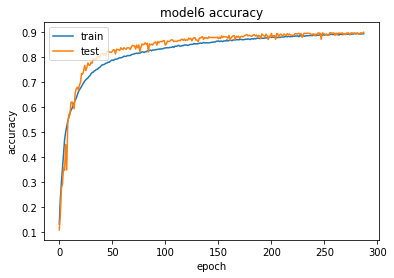

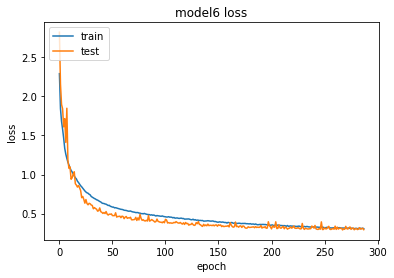

In [0]:
plt.plot(histories[5].history['acc'])
plt.plot(histories[5].history['val_acc'])
plt.title('model6 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(histories[5].history['loss'])
plt.plot(histories[5].history['val_loss'])
plt.title('model6 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##Model7 history

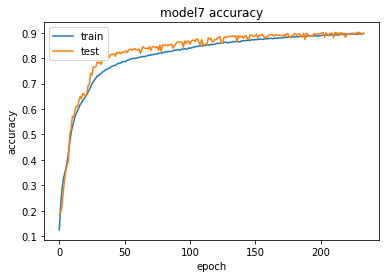

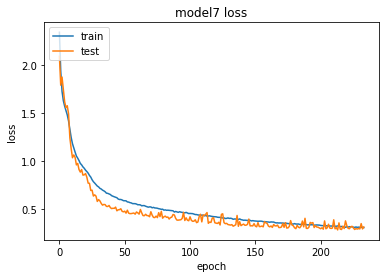

In [0]:
plt.plot(histories[6].history['acc'])
plt.plot(histories[6].history['val_acc'])
plt.title('model7 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(histories[6].history['loss'])
plt.plot(histories[6].history['val_loss'])
plt.title('model7 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##Validation performance metric using kfold

In [0]:
def accu_eval(predicted, true_value):
    accur = np.zeros(predicted.shape)
    accur[predicted == true_value] = 1
    return (sum(accur) / accur.shape[0]) * 100

In [0]:
for index, model in enumerate(models):
  model.load_weights(f'final_models/model{index}.h5')

In [0]:
accuracies = []
for m in models:
  preds = m.predict(data2)
  my_preds = []
  for pred in preds:
    ps = list(pred)
    my_preds.append(ps.index(max(ps)))
  accuracies.append(accu_eval(np.array(my_preds), targets))

In [0]:
accuracies

[35.193333333333335,
 41.70333333333333,
 74.965,
 90.60833333333333,
 92.46833333333333,
 93.07666666666667,
 92.79333333333334]

In [0]:
accuracies = [
              35.193333333333335,
              41.70333333333333,
              74.965,
              90.60833333333333,
              92.46833333333333,
              93.07666666666667,
              92.79333333333334]

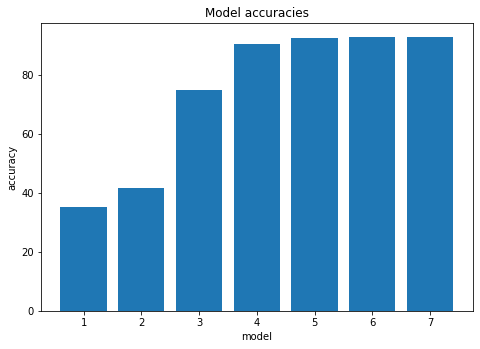

In [0]:
import matplotlib.pyplot as plt
model_names = [i + 1 for i in range(7)]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(model_names,accuracies)

plt.title('Model accuracies')
plt.ylabel('accuracy')
plt.xlabel('model')
plt.show()

##Kaggle competition scripting

In [0]:
model.load_weights(F"models/es_best_model15.h5")

In [0]:
def accu_eval(predicted, true_value):
    accur = np.zeros(predicted.shape)
    accur[predicted == true_value] = 1
    return (sum(accur) / accur.shape[0]) * 100

In [0]:
preds = models[5].predict(allData)
my_preds = []
for pred in preds:
    ps = list(pred)
    my_preds.append(ps.index(max(ps)))

accu_eval(np.array(my_preds), targets)

NameError: ignored

In [0]:
!pip install h5py pyyaml

In [0]:
model_save_name = 'model1_early_stoping_new_93_79166666666666__bacth_50_12.h5'
# path = F"/content/gdrive/My Drive/models/{model_save_name}"
path = F"models/{model_save_name}"
model.save(path)

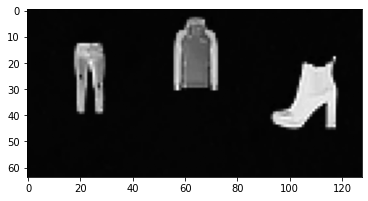

In [0]:
data_test = pickle.load( open( './Test.pkl', 'rb' ), encoding='bytes')
plt.imshow(data_test[-188,:,:],cmap='gray', vmin=0, vmax=256)

In [0]:
preds_test = models[5].predict(data_test.reshape(10000, 64, 128,1))
test_preds = []
indexes = []
for i, pred in enumerate(preds_test):
    ps = list(pred)
    indexes.append(i)
    test_preds.append(ps.index(max(ps)))

In [0]:
df = pd.DataFrame({}) 

df['id'] = np.array(indexes)
df['output'] = np.array(test_preds)

result_file_name = 'aresultmarch25_2_best_es_best_model15.csv'
path2 = F"predictions/{result_file_name}"
df.to_csv(path2, sep=',', encoding='utf-8', index=False)

In [0]:
!cd ..

In [0]:
!ls

In [0]:
file_name = 'aresultmarch24_1_best_es_best_model13.csv'
path3 = F"predictions/{result_file_name}"
file_name = 'resultmarch21_2.csv'
path4 = F"predictions/{result_file_name}"

In [0]:
y_1 = np.genfromtxt(path3, delimiter=',')
y_1 = y_1[1:]
y_1 = y_1[:,1:].reshape(10000,)

In [0]:
accu_eval(np.array(my_preds), y_1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


0.0